In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from datetime import datetime
from collections import Counter
from collections import defaultdict
from matplotlib.dates import date2num, num2date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [123]:
df1 = pd.read_csv('/Users/ignatiustobiassoetjianto/Desktop/Project/BEE2041_Project/Data_files/df1_wc.csv')
df1

,Release Date,Character,Rarity,Constellation Description,Word Count
0,2020-12-23,Albedo,5star,Transient Blossoms generated by Albedo's Abiog...,141
1,2023-01-18,Alhaitham,5star,"When a Projection Attack hits an opponent, Uni...",252
2,2021-10-13,Aloy,5star,This character has no constellations.,5
3,2021-07-01,Ayaka,5star,When Kamisato Ayaka's Normal or Charged Attack...,138
4,2022-03-30,Ayato,5star,Shunsuiken DMG is increased by 40% against opp...,121
...,...,...,...,...,...
80,2020-09-28,traveler(anemo),5star,Palm Vortex pulls in enemies within a 5m radiu...,80
81,2020-09-28,traveler(dendro),5star,"After Razorgrass Blade hits an opponent, it wi...",126
82,2020-09-28,qiqi,5star,When the Herald of Frost hits an enemy marked ...,102
83,2020-09-28,mona,5star,The effects of Hydro-related Elemental Reactio...,165


In [146]:
#Summary Statistics

df1.describe()

,Word Count
count,85.000000
mean,153.564706
std,60.457669
min,5.000000
25%,111.000000
50%,139.000000
75%,180.000000
max,358.000000


In [124]:
#type(df1['Release Date'][0])

In [125]:
df1['Release Date'] = pd.to_datetime(df1['Release Date'])

In [126]:
#type(df1['Release Date'][0])

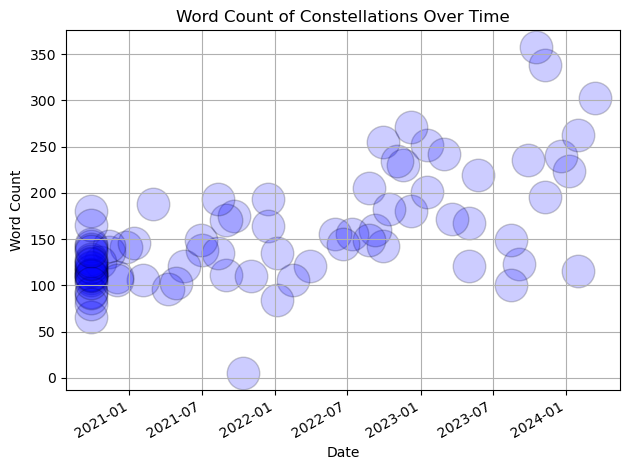

In [127]:
#Creating plots with the new data frame.

df1.plot.scatter(x='Release Date', y = 'Word Count', color = 'blue',
                 marker = 'o', edgecolor = 'black', alpha = 0.20, s=550)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Word Count of Constellations Over Time')

# Formatting x-axis ticks as dates
plt.xticks(rotation=30, ha='right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [128]:
#Splitting original dataframe into a list, and then converting the list into a pd.DataFrame

Rarity = df1.groupby('Rarity')
df1_Rarity = [group_df for _, group_df in Rarity]
df1_Epic, df1_Legendary = df1_Rarity

#Splitting original dataframe into a list, and then converting the list into a pd.DataFrame

Rarity = df1.groupby('Rarity')
df1_Rarity = [group_df for _, group_df in Rarity]
df1_Epic, df1_Legendary = df1_Rarity

df1_Epic.reset_index(inplace = True, drop = True)
df1_Legendary.reset_index(inplace = True, drop = True)

#display(df_Epic_2)
#display(df_Legendary_2)

In [129]:
#Create Function that count specific words/strings

def count_target_words(Input, Target):
    words = Input.split()
    count = 0
    
    
    for target in Target:
        for word in words:
#        word = word.strip('.,?!:;-()[]{}\'"')
    
            if word == target:
                count += 1
    
    return count

In [130]:
#Modifying df1 to have compatible constellation descriptions

df1['Constellation Desc'] = df1['Constellation Description'].replace(".", "").replace('(', "").replace(')', "")
df1['Constellation Desc'] = df1['Constellation Desc'].apply(lambda x: x.lower())
#df1 = df1.drop(columns = ['Constellation Description'])

df1

,Release Date,Character,Rarity,Constellation Description,Word Count,Constellation Desc
0,2020-12-23,Albedo,5star,Transient Blossoms generated by Albedo's Abiog...,141,transient blossoms generated by albedo's abiog...
1,2023-01-18,Alhaitham,5star,"When a Projection Attack hits an opponent, Uni...",252,"when a projection attack hits an opponent, uni..."
2,2021-10-13,Aloy,5star,This character has no constellations.,5,this character has no constellations.
3,2021-07-01,Ayaka,5star,When Kamisato Ayaka's Normal or Charged Attack...,138,when kamisato ayaka's normal or charged attack...
4,2022-03-30,Ayato,5star,Shunsuiken DMG is increased by 40% against opp...,121,shunsuiken dmg is increased by 40% against opp...
...,...,...,...,...,...,...
80,2020-09-28,traveler(anemo),5star,Palm Vortex pulls in enemies within a 5m radiu...,80,palm vortex pulls in enemies within a 5m radiu...
81,2020-09-28,traveler(dendro),5star,"After Razorgrass Blade hits an opponent, it wi...",126,"after razorgrass blade hits an opponent, it wi..."
82,2020-09-28,qiqi,5star,When the Herald of Frost hits an enemy marked ...,102,when the herald of frost hits an enemy marked ...
83,2020-09-28,mona,5star,The effects of Hydro-related Elemental Reactio...,165,the effects of hydro-related elemental reactio...


In [60]:
#Creating new dataframe with different counts (df2), on the 4 star characters

df2_Epic = df1_Epic#.drop(columns = ['Word Count'])
df2_Epic['Constellation Desc'] = df2_Epic['Constellation Description'].replace(".", "").replace('(', "").replace(')', "")

#df['Text'] = df['Text'].apply(lambda x: x.lower())
df2_Epic['Constellation Desc'] = df2_Epic['Constellation Desc'].apply(lambda x: x.lower())
df2_Epic = df2_Epic.drop(columns = ['Constellation Description'])

#Aggregate of all "Meaningful" key word stats.
df2_Epic['Key Count'] = df2_Epic['Constellation Desc'].apply(lambda x: count_target_words(x, ['crit',
                                                                                              'energy',
                                                                                              'increase',
                                                                                              'increases',
                                                                                              'decrease',
                                                                                              'decreases',
                                                                                              'recharge',
                                                                                              'atk',
                                                                                              'dmg',
                                                                                              'elemental',
                                                                                              'element',
                                                                                              'refund',
                                                                                              'attacks',
                                                                                              'reaction',
                                                                                              'reactions',
                                                                                              'attack']))


#Creating plots for 4 Star Rarities key words

#df2_Epic.plot.scatter(x = 'Release Date', y = 'Key Count', color='#945dc4',
#                 marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

#Adding labels and title
#plt.xlabel('Date')
#plt.ylabel('Word Count')
#plt.title('Key Word Count of 4star Constellations Over Time')

#Formatting x-axis ticks as dates
#plt.xticks(rotation=30, ha='right')

#Display the plot
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [61]:
#Creating new dataframe with different counts (df2), on the 5 star characters

df2_Legendary = df1_Legendary#.drop(columns = ['Word Count'])
df2_Legendary['Constellation Desc'] = df2_Legendary['Constellation Description'].replace(".", "").replace('(', "").replace(')', "")

#df['Text'] = df['Text'].apply(lambda x: x.lower())
df2_Legendary['Constellation Desc'] = df2_Legendary['Constellation Desc'].apply(lambda x: x.lower())
df2_Legendary = df2_Legendary.drop(columns = ['Constellation Description'])

#Aggregate of all "Meaningful" key word stats.
df2_Legendary['Key Count'] = df2_Legendary['Constellation Desc'].apply(lambda x: count_target_words(x, ['crit',
                                                                                              'energy',
                                                                                              'increase',
                                                                                              'increases',
                                                                                              'decrease',
                                                                                              'decreases',
                                                                                              'recharge',
                                                                                              'atk',
                                                                                              'dmg',
                                                                                              'elemental',
                                                                                              'element',
                                                                                              'refund',
                                                                                              'attacks',
                                                                                              'reaction',
                                                                                              'reactions',
                                                                                              'attack']))

In [ ]:
#Creating subplots for 4 Star Rarities key words

#Data
X1_test = df2_Epic['Release Date']
X1_test_int = X1_test.astype(int)

Y1_test = df2_Epic['Key Count']

df2_Epic_set = np.polyfit(X1_test_int, Y1_test, 1)
df2_Epic_line = np.poly1d(df2_Epic_set)

r_value = np.corrcoef(X1_test_int, Y1_test)[0, 1]



#Setting the Subplot
df2_TEST_1, ax = plt.subplots(1, 2, figsize=(12, 5))


#Scatter Plot
ax[0].scatter(X1_test, Y1_test, color='#945dc4',
              marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)


ax[0].set_xlabel('Release Date')
ax[0].set_ylabel('Key Words Count')
ax[0].set_title('Scatter plot of key words overtime')



#Creating Line of Best Fit

#ax[1].plot(X1_test_int, poly(X1_test_int), color='red', label='Line of Best Fit')

ax[1].plot(X1_test_int, df2_Epic_line(X1_test_int), color = 'red', label = f'Line of Best Fit (r={r_value:.3f})')

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Key Words Count')
ax[1].set_title('Line of Best Fit')



#df2_Epic_set = np.polyfit(X1_test_int, Y1_test, 1)
#df2_Epic_line = np.poly1d(df2_Epic_set)




#plt.plot(X1_test_int, df2_Epic_line(X1_test_int), color='red', label='Line of Best Fit')

#Convert from data back into datetime?
#pd.to_datetime(X1_test)



#Formatting x-axis ticks as dates

for axis in ax:
    axis.tick_params(axis = 'x', rotation=30)
    axis.grid(True)
#    axis.tight_layout()
    
    
#Display the plot
#plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

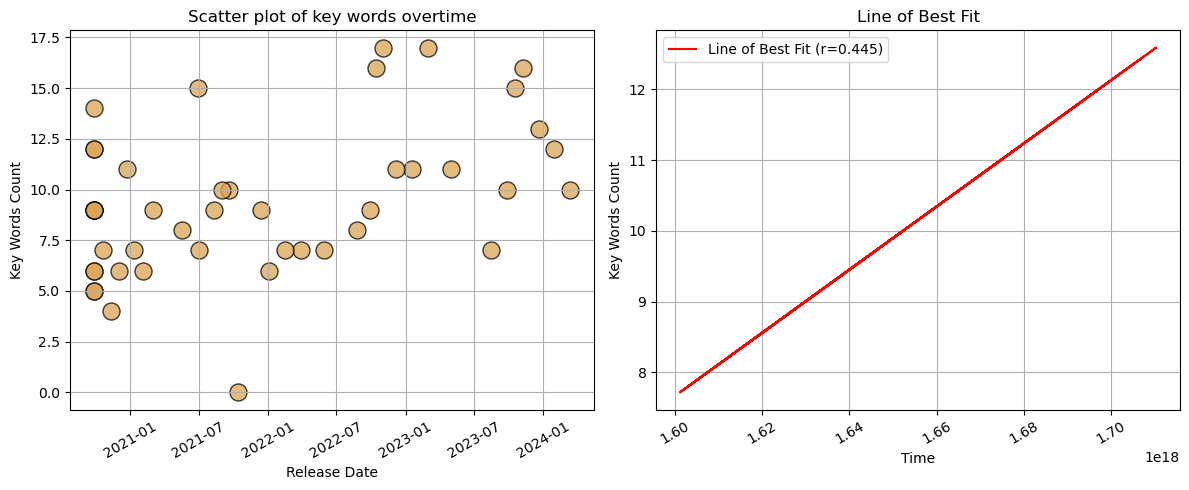

In [22]:
#Creating subplots for 5 Star Rarities key words

#Data
X1_test = df2_Legendary['Release Date']
X1_test_int = X1_test.astype(int)

Y1_test = df2_Legendary['Key Count']

df2_Legendary_set = np.polyfit(X1_test_int, Y1_test, 1)
df2_Legendary_line = np.poly1d(df2_Legendary_set)

r_value = np.corrcoef(X1_test_int, Y1_test)[0, 1]


#Setting Subplots
df2_TEST_2, ax = plt.subplots(1, 2, figsize=(12, 5))


#Scatter Plot
ax[0].scatter(X1_test, Y1_test, color='#dca454',
              marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

ax[0].set_xlabel('Release Date')
ax[0].set_ylabel('Key Words Count')
ax[0].set_title('Scatter plot of key words overtime')



#Creating Line of Best Fit
ax[1].plot(X1_test_int, df2_Legendary_line(X1_test_int), color = 'red', label = f'Line of Best Fit (r={r_value:.3f})')

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Key Words Count')
ax[1].set_title('Line of Best Fit')



#Formatting x-axis

for axis in ax:
    axis.tick_params(axis = 'x', rotation=30)
    axis.grid(True)
    
    
#Display the plot
plt.tight_layout()
plt.legend()
plt.show()

In [142]:
#Creating a function to make the subplot system


def get_keyword_count_graph(dataframe):
    
    
#Data
#    X1_test = dataframe['Release Date']
#    X1_test_int = X1_test.astype(int)

#    Y1_test = dataframe['Key Count']

#    dataframe_set = np.polyfit(X1_test_int, Y1_test, 1)
#    dataframe_line = np.poly1d(dataframe_set)

#    r_value = np.corrcoef(X1_test_int, Y1_test)[0, 1]


#Setting Subplots
    dataframe_TEST, ax = plt.subplots(1, 2, figsize=(12, 5))


    rarity_types = dataframe['Rarity'].unique().tolist()
    
    
    
#Scatter Plot

    if len(rarity_types) == 2:
        
        dataframe = create_key_count_col(dataframe)
        
        X1_test = dataframe['Release Date']
        X1_test_int = X1_test.astype(int)
        Y1_test = dataframe['Key Count']
        dataframe_set = np.polyfit(X1_test_int, Y1_test, 1)
        dataframe_line = np.poly1d(dataframe_set)
        r_value = np.corrcoef(X1_test_int, Y1_test)[0, 1]
        
        ax[0].scatter(X1_test, Y1_test, color='blue',
                      marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

        ax[0].set_xlabel('Release Date', fontweight = "bold")
        ax[0].set_ylabel('Key Words Count', fontweight = "bold")
        ax[0].set_title('Scatter Plot of Character Constellation key words overtime')

        
    
    else:
        
        X1_test = dataframe['Release Date']
        X1_test_int = X1_test.astype(int)
        Y1_test = dataframe['Key Count']
        dataframe_set = np.polyfit(X1_test_int, Y1_test, 1)
        dataframe_line = np.poly1d(dataframe_set)
        r_value = np.corrcoef(X1_test_int, Y1_test)[0, 1]
        
        if dataframe['Rarity'][0] == '4star':
            ax[0].scatter(X1_test, Y1_test, color='#945dc4',
                          marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

            ax[0].set_xlabel('Release Date', fontweight = "bold")
            ax[0].set_ylabel('Key Words Count', fontweight = "bold")
            ax[0].set_title('Scatter Plot of 4 star Character key words overtime')

        else:
            ax[0].scatter(X1_test, Y1_test, color='#dca454',
                          marker = 'o', edgecolor = 'black', alpha = 0.75, s = 150)

            ax[0].set_xlabel('Release Date', fontweight = "bold")
            ax[0].set_ylabel('Key Words Count', fontweight = "bold")
            ax[0].set_title('Scatter Plot of 5 star Character key words overtime')

            
        
#Creating Line of Best Fit
    ax[1].plot(X1_test_int, dataframe_line(X1_test_int), color = 'red', 
               label = f'Line of Best Fit (r={r_value:.3f})')

    ax[1].set_xlabel('Time', fontweight = "bold")
    ax[1].set_ylabel('Key Words Count', fontweight = "bold")
    ax[1].set_title('Line of Best Fit')



#Formatting x-axis

    for axis in ax:
        axis.tick_params(axis = 'x', rotation=30)
        axis.grid(True)
    
    
#Display the plot
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    #return dataframe_TEST
    

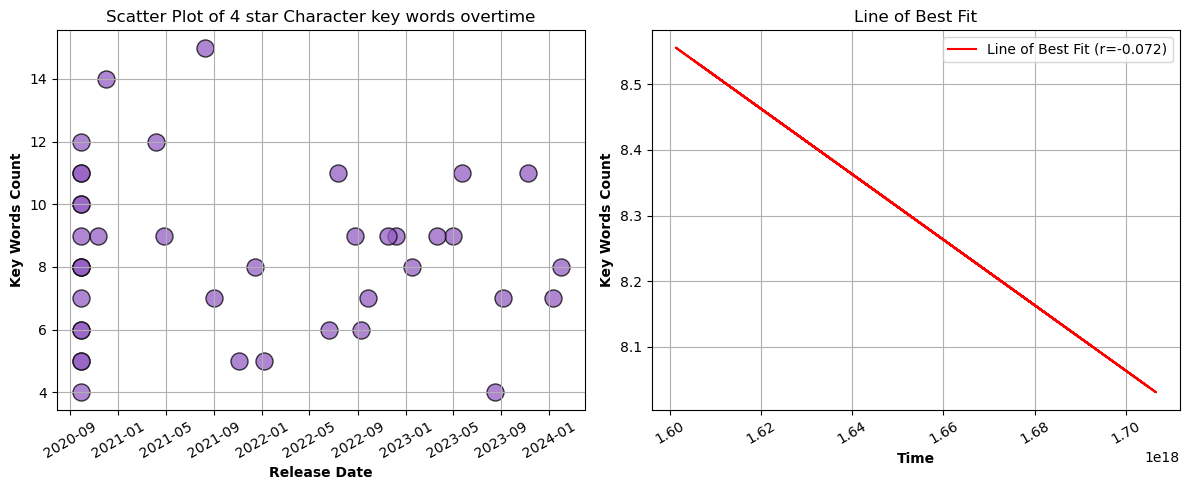

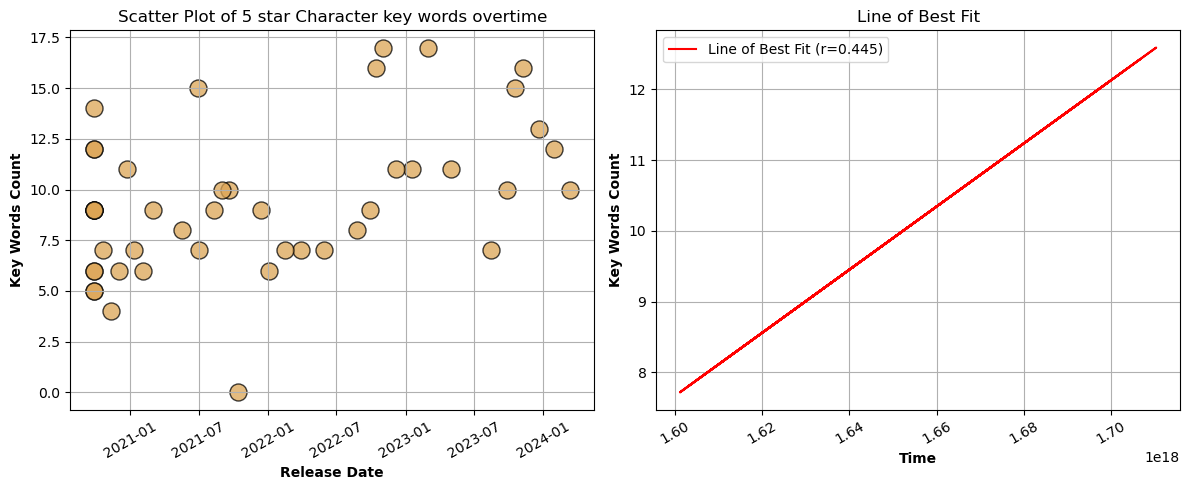

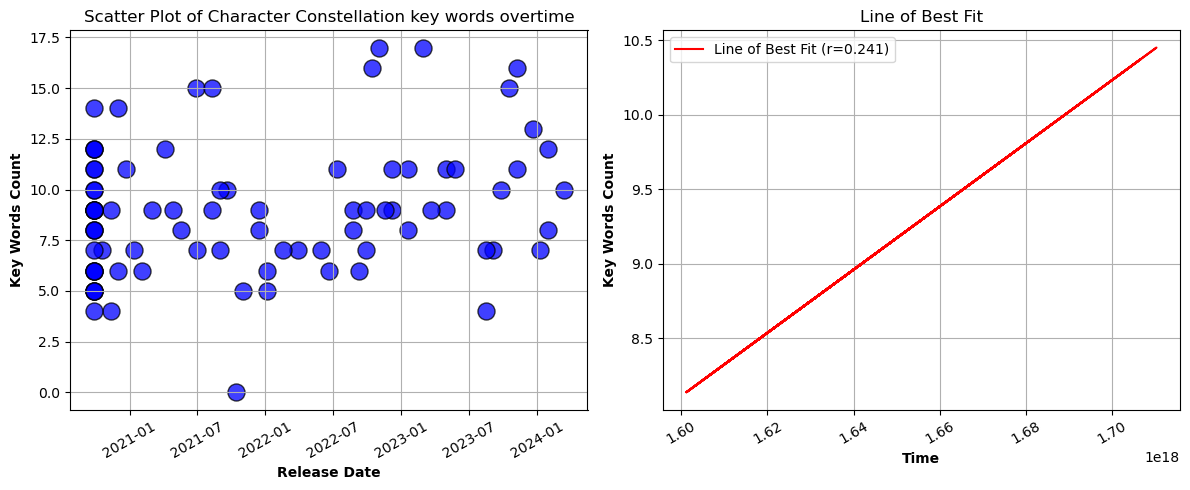

In [143]:
get_keyword_count_graph(df2_Epic)
get_keyword_count_graph(df2_Legendary)
get_keyword_count_graph(df1)

In [62]:
#if df2_Epic['Rarity'][0] == '4star':
#    print('Its Epic')

In [107]:
#Creating a function to make a histogram


def get_histogram_simple(dataframe):
    

#Aggregating all 4 stars into one paragraph.
    dataframe_cons_all = ' '.join(dataframe['Constellation Description'])

#Cleaning the paragraph
    testing1 = dataframe_cons_all.replace(".", "").replace('(', "").replace(')', "")
#testing1

#Splitting paragraphs by word
    testing2 = testing1.lower().split()
#testing2

#Making a word count and distribution
    testing3 = Counter(testing2).most_common(15)        #Note: Choose the top frequencies as desired
#testing3

#Converting into usable DataFrame
    testing4 = pd.DataFrame(testing3, columns=['Word', 'Frequency'])
    testing4 = testing4[::-1]
#testing4[4:10]


    rarity_types = dataframe['Rarity'].unique().tolist()

#Plotting into bar chart
    
    if len(rarity_types) == 2:
        plt.barh(testing4['Word'], testing4['Frequency'], color = "blue")

        plt.xlabel('Frequency', fontsize = 11, fontweight = 'bold')
        plt.ylabel('Words', fontsize = 10, fontweight = 'bold')
        plt.title('Word Frequency Distribution of Character Constellations')
        plt.xticks(rotation=0, fontsize = 10)

    else:
        
        if dataframe['Rarity'][0] == '4star':
            plt.barh(testing4['Word'], testing4['Frequency'], color = "#945dc4")

            plt.xlabel('Frequency', fontsize = 11, fontweight = 'bold')
            plt.ylabel('Words', fontsize = 10, fontweight = 'bold')
            plt.title('Word Frequency Distribution of 4star Constellations')
            plt.xticks(rotation=0, fontsize = 10)
        
        else:
            plt.barh(testing4['Word'], testing4['Frequency'], color = "#dca454")

            plt.xlabel('Frequency', fontsize = 11, fontweight = 'bold')
            plt.ylabel('Words', fontsize = 10, fontweight = 'bold')
            plt.title('Word Frequency Distribution of 5star Constellations')
            plt.xticks(rotation=0, fontsize = 10)

        
    plt.show()

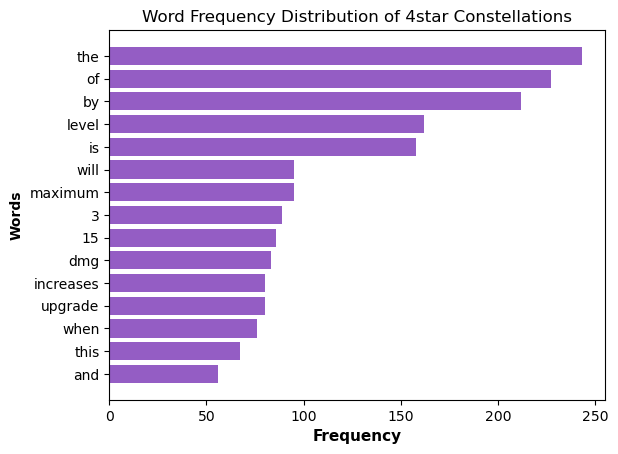

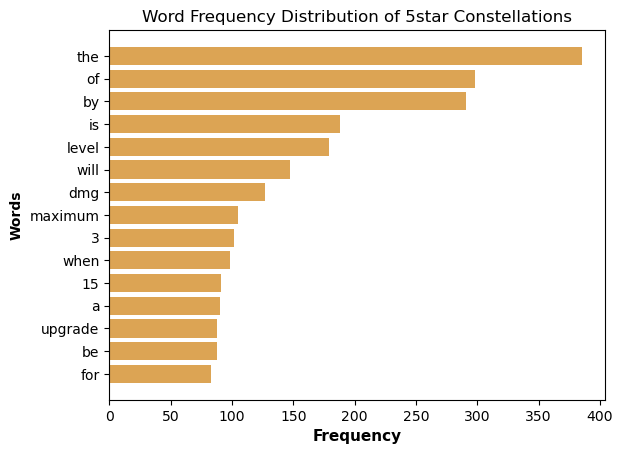

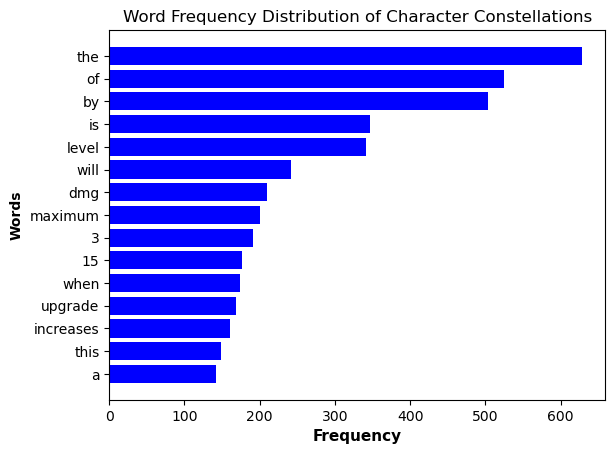

In [104]:
get_histogram_simple(df1_Epic)
get_histogram_simple(df1_Legendary)
get_histogram_simple(df1)

In [105]:
#df1_Epic['Constellation Desc']

#How to identify

#x = df1['Rarity'].unique().tolist()
#len(x)

In [106]:
df1['Constellation Desc'][5]

"universal diagnosis gains 1 additional charge. when your own active character hits a nearby opponent with their attacks, baizhu will unleash a gossamer sprite: splice. gossamer sprite: splice will initiate 1 attack before returning, dealing 250% of baizhu's atk as dendro dmg and healing for 20% of universal diagnosis's gossamer sprite's normal healing. dmg dealt this way is considered elemental skill dmg. this effect can be triggered once every 5s. increases the level of holistic revivification by 3. maximum upgrade level is 15. for 15s after holistic revivification is used, baizhu will increase all nearby party members' elemental mastery by 80. increase the level of universal diagnosis by 3. maximum upgrade level is 15. increases the dmg dealt by holistic revivification's spiritveins by 8% of baizhu's max hp. additionally, when a gossamer sprite or gossamer sprite: splice hits opponents, there is a 100% chance of generating one of holistic revivification's seamless shields. this effe

In [111]:
df1

,Release Date,Character,Rarity,Constellation Description,Word Count,Constellation Desc
0,2020-12-23,Albedo,5star,Transient Blossoms generated by Albedo's Abiog...,141,transient blossoms generated by albedo's abiog...
1,2023-01-18,Alhaitham,5star,"When a Projection Attack hits an opponent, Uni...",252,"when a projection attack hits an opponent, uni..."
2,2021-10-13,Aloy,5star,This character has no constellations.,5,this character has no constellations.
3,2021-07-01,Ayaka,5star,When Kamisato Ayaka's Normal or Charged Attack...,138,when kamisato ayaka's normal or charged attack...
4,2022-03-30,Ayato,5star,Shunsuiken DMG is increased by 40% against opp...,121,shunsuiken dmg is increased by 40% against opp...
...,...,...,...,...,...,...
80,2020-09-28,traveler(anemo),5star,Palm Vortex pulls in enemies within a 5m radiu...,80,palm vortex pulls in enemies within a 5m radiu...
81,2020-09-28,traveler(dendro),5star,"After Razorgrass Blade hits an opponent, it wi...",126,"after razorgrass blade hits an opponent, it wi..."
82,2020-09-28,qiqi,5star,When the Herald of Frost hits an enemy marked ...,102,when the herald of frost hits an enemy marked ...
83,2020-09-28,mona,5star,The effects of Hydro-related Elemental Reactio...,165,the effects of hydro-related elemental reactio...


In [136]:
#Creating new Function to generate new dataframe column "Key Count"

def create_key_count_col(dataframe):

    key_words = ['crit', 'energy', 'increase', 'increases', 'decrease', 'decreases', 'recharge', 'atk',
                 'dmg', 'elemental', 'element', 'refund', 'attacks', 'reaction', 'reactions', 'attack']
    
    test1 = dataframe#.drop(columns = ['Word Count'])
    
    if 'Constellation Desc' in test1.columns and 'Key Count' in test1.columns:
        return test1
    
    else:
    
        test1['Constellation Desc'] = test1['Constellation Description'].replace(".", "").replace('(', "").replace(')', "")

#df['Text'] = df['Text'].apply(lambda x: x.lower())
        test1['Constellation Desc'] = test1['Constellation Desc'].apply(lambda x: x.lower())
        test1 = test1.drop(columns = ['Constellation Description'])

#Aggregate of all "Meaningful" key word stats.
        test1['Key Count'] = test1['Constellation Desc'].apply(lambda x: count_target_words(x, key_words))
                                                           
    return test1


In [137]:
create_key_count_col(df1)

,Release Date,Character,Rarity,Word Count,Constellation Desc,Key Count
0,2020-12-23,Albedo,5star,141,transient blossoms generated by albedo's abiog...,11
1,2023-01-18,Alhaitham,5star,252,"when a projection attack hits an opponent, uni...",11
2,2021-10-13,Aloy,5star,5,this character has no constellations.,0
3,2021-07-01,Ayaka,5star,138,when kamisato ayaka's normal or charged attack...,7
4,2022-03-30,Ayato,5star,121,shunsuiken dmg is increased by 40% against opp...,7
...,...,...,...,...,...,...
80,2020-09-28,traveler(anemo),5star,80,palm vortex pulls in enemies within a 5m radiu...,9
81,2020-09-28,traveler(dendro),5star,126,"after razorgrass blade hits an opponent, it wi...",5
82,2020-09-28,qiqi,5star,102,when the herald of frost hits an enemy marked ...,5
83,2020-09-28,mona,5star,165,the effects of hydro-related elemental reactio...,14


In [147]:
df1['Constellation Desc'][0]

"transient blossoms generated by albedo's abiogenesis: solar isotoma regenerate 1.2 energy for albedo. transient blossoms generated by abiogenesis: solar isotoma grant albedo fatal reckoning for 30s: each stack of fatal reckoning increases dmg by of albedo's def. the effect stacks up to 4 times. unleashing rite of progeniture: tectonic tide consumes all stacks of fatal reckoning, increasing the dmg dealt by the tectonic tide and fatal blossoms based on the number of stacks consumed. increases the level of abiogenesis: solar isotoma by 3. maximum upgrade level is 15. solar isotoma increases plunging attack dmg by 30% for active party members within the aoe. increases the level of rite of progeniture: tectonic tide by 3. maximum upgrade level is 15. if active party members within the aoe are protected by a shield created by crystallize, solar isotoma increases their dmg by 17%."